# **Modelación Data Estructurada**

### **ANÁLISIS DESCRIPTIVO Y EXPLORATORIO**

In [21]:
import pandas as pd
import numpy as np

train=pd.read_csv(r"C:\Users\Rayzek\Documents\PROYECTOS\DATASETS\TEST KONECTA\bd_train.csv")
test=pd.read_csv(r"C:\Users\Rayzek\Documents\PROYECTOS\DATASETS\TEST KONECTA\bd_test.csv")


#ESTABLECEMOS LA VARIABLE OBJETIVO Y LAS VARIABLES DEPENDIENTES
y=train["precio"]
X= train.drop("precio", axis=1)

precio_promedio=y.mean()

In [22]:
train.info()
#NOTAMOS QUE NO HAY NULOS, NI VACIOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   precio       1576 non-null   float64
 1   metros2      1576 non-null   int64  
 2   anyo         1576 non-null   int64  
 3   banyo        1576 non-null   int64  
 4   Sp           1576 non-null   int64  
 5   Sm           1576 non-null   int64  
 6   calefaccion  1576 non-null   int64  
 7   cocina       1576 non-null   int64  
 8   situacion    1576 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 110.9 KB


In [23]:
train.describe()
#OBSERVAMOS QUE LA MEDIA DE LA VARIABLE OBJETIVO ES 1.627958E+06

,precio,metros2,anyo,banyo,Sp,Sm,calefaccion,cocina,situacion
count,1.576000e+03,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,1.627958e+06,67.584391,1978.678299,0.277284,0.081853,0.021574,0.196066,0.082487,2.195431
std,7.585645e+05,20.679056,28.972805,0.447800,0.274227,0.145333,0.397145,0.275193,0.566699
min,2.034000e+05,30.000000,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.088400e+06,53.000000,1964.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.477000e+06,67.000000,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,2.044600e+06,81.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,5.739800e+06,120.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [24]:
train.head()
#OBSERVAMOS LA CABEZA DE LOS DATOS

,precio,metros2,anyo,banyo,Sp,Sm,calefaccion,cocina,situacion
0,1386600.0,50,2002,0,0,0,0,0,2
1,844000.0,54,2002,0,0,0,0,0,2
2,1473200.0,70,2002,0,0,0,0,0,2
3,2590200.0,55,1923,0,0,0,0,0,2
4,790000.0,46,1987,0,0,0,1,0,2


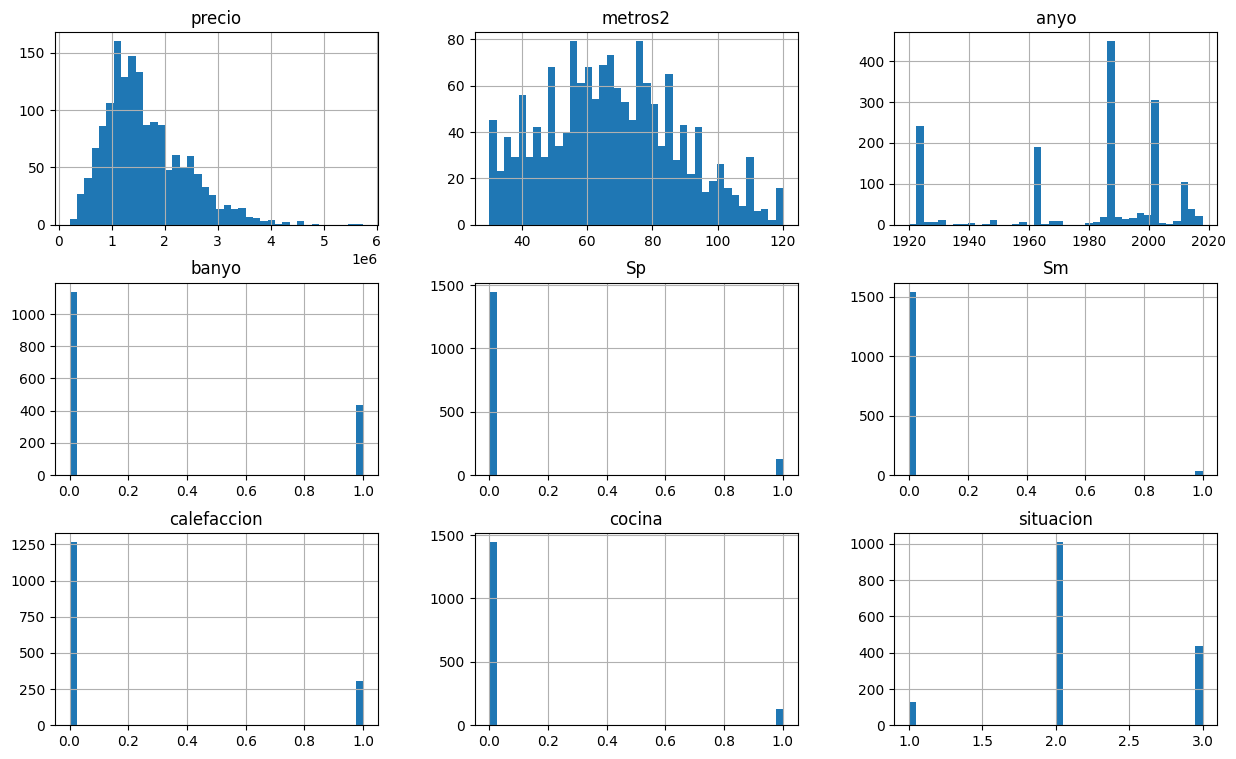

In [25]:
import matplotlib.pyplot as plt
train.hist(bins=40, figsize=(15,9))
plt.show()
#PODEMOS VER QUE LA GRÁFICA DEL PRECIO, TIENE UNA DISTRIBUCIÓN QUE DETALLAREMOS MÁS ADELANTE

C:\Users\Rayzek\AppData\Local\Temp\ipykernel_14896\2159609580.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(train['precio'])


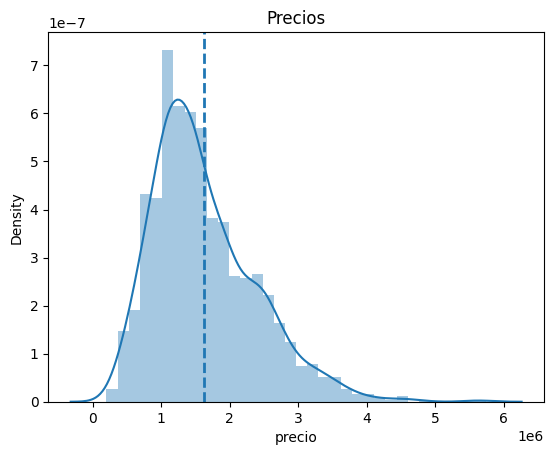

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.distplot(train['precio'])
ax.axvline(x=train['precio'].mean(), linestyle='--', linewidth=2)
plt.title('Precios');

#GRAFICAREMOS A DETALLE LA GRAFICA DEL PRECIO PARA VER SU DISTRIBUCION Y QUE ES ASIMETRICA POSITIVA. 

<AxesSubplot: >

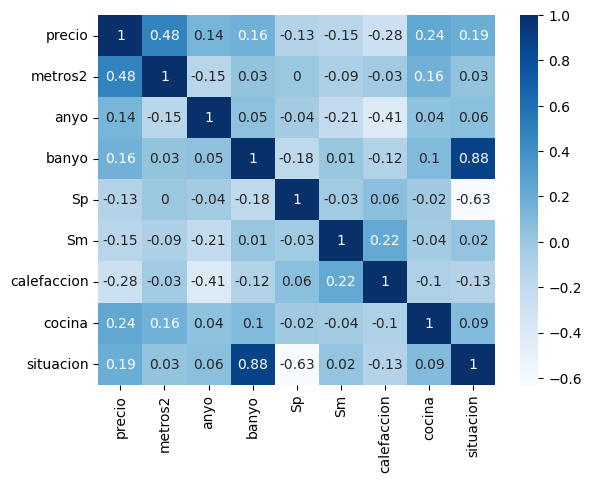

In [27]:
import seaborn as sns
correlacion = train[['precio', 'metros2', 'anyo', 'banyo', 'Sp', 'Sm', 'calefaccion','cocina', 'situacion']]
correlacion=correlacion.corr().round(2)
plt.show()
sns.heatmap(correlacion, annot=True,cmap="Blues")

#EN ESTA GRAFICA VEREMOS LA CORRELACION DE LAS VARIABLES CON LA VARIABLE OBJETIVO. DONDE OBSERVAMOS QUE LAS VAR SP Y ANYO, SON LAS QUE PRESENTAN LA CORRELACIÓN MÁS BAJA

### **ANÁLISIS DE SELECCIÓN DE CARACTERISTICAS**

#### **SELECCIONANDO VARIABLES POR CORRELACIÓN**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#SE DESCARTA VARIABLES SP Y AÑO
X=X[['metros2', 'banyo', 'Sm', 'calefaccion', 'cocina', 'situacion']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)


coef = pd.Series(reg.coef_, index = X_train.columns)
LASSO_VARS=coef[coef!=0].index.tolist()

print("VARIABLES SELECCIONADAS TRAS SELECCIÓN DE VARIABLES POR CORRELACIÓN: ",LASSO_VARS)

y_pred = reg.predict(X_test)
RMSE_LASSO = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE DESPUES DE LA SELECCIÓN POR CORRELACIÓN: "+str(RMSE_LASSO))

VARIABLES SELECCIONADAS TRAS SELECCIÓN DE VARIABLES POR CORRELACIÓN:  ['metros2', 'banyo', 'Sm', 'calefaccion', 'cocina', 'situacion']
RMSE DESPUES DE LA SELECCIÓN POR CORRELACIÓN: 621551.3320792443


#### **SELECCIONANDO VARIABLES CON RFE**

In [29]:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# CREAMOS UN OBJETO DE REGRESIÓN LINEAL
modelo = LinearRegression()

Lista_RMSE = []
Posicion_RMSE = []
elementos=len(X.columns)


#COMENZAREMOS A ITERAR PARA VER CON QUE CANTIDAD DE VARIABLES SE TIENE EL MENOR RMSE
for i in range(elementos):
    # CREAMOS UN OBJETO RFE PARA SELECCIONAR n CARACTERÍSTICAS
    rfe = RFE(modelo,n_features_to_select=i+1)

    # AJUSTAMOS EL MODELO RFE AL CONJUNTO DE DATOS
    X_rfe = rfe.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_rfe, y,test_size=0.3,random_state=42)

    #ENTRENAMOS EL NUEVO MODELO
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    Lista_RMSE.append(rmse)
    print("Con "+str(i+1)+" variables se obtiene un RMSE de "+str(rmse))
    extra=i+1
    Posicion_RMSE.append(extra)

posicion=pd.Series(Lista_RMSE).idxmin()
RMSE_RFE=min(Lista_RMSE)
cant_var_usar=Posicion_RMSE[posicion]

#ESTA VEZ APLCIAREMOS OTRA VEZ RFE PERO PARA PODER EXTRAER LAS VARIABLES A FILTRAR
rfe = RFE(modelo,n_features_to_select=cant_var_usar)
X_rfe = rfe.fit_transform(X, y)
cabeceras_nuevas=X.columns[(rfe.get_support())]


X=X[cabeceras_nuevas]

print("LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE: ",cant_var_usar)
print("RMSE DESPUES DEL RFE: "+str(RMSE_RFE))
print("VARIABLES SELECCIONADAS POR RFE: ",cabeceras_nuevas)

Con 1 variables se obtiene un RMSE de 750401.8120347569
Con 2 variables se obtiene un RMSE de 718877.1574678771
Con 3 variables se obtiene un RMSE de 716085.3663217392
Con 4 variables se obtiene un RMSE de 705751.4285384227
Con 5 variables se obtiene un RMSE de 706033.3481037642
Con 6 variables se obtiene un RMSE de 621551.3320792443
LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE:  6
RMSE DESPUES DEL RFE: 621551.3320792443
VARIABLES SELECCIONADAS POR RFE:  Index(['metros2', 'banyo', 'Sm', 'calefaccion', 'cocina', 'situacion'], dtype='object')


#### **SELECCIONANDO VARIABLES CON LASSO REGRESION**

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#utilizar LassoCV para seleccionar variables
reg = LassoCV(cv=5)
reg.fit(X_train, y_train)


coef = pd.Series(reg.coef_, index = X_train.columns)
LASSO_VARS=coef[coef!=0].index.tolist()

print("VARIABLES SELECCIONADAS POR LASSO REGRESIÓN: ",LASSO_VARS)

y_pred = reg.predict(X_test)
RMSE_LASSO = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE DESPUES DEL LASSO REGRESION: "+str(RMSE_LASSO))

#ESTABLECEMOS LAS VARIABLES FINALES A USAR EN LA DATA
X=X[LASSO_VARS]
test=test[LASSO_VARS]

VARIABLES SELECCIONADAS POR LASSO REGRESIÓN:  ['metros2', 'calefaccion', 'cocina', 'situacion']
RMSE DESPUES DEL LASSO REGRESION: 626088.2613637695


#### **ITERANDO TODOS LOS MODELOS QUE SE ADAPTAN A NUESTRO PROBLEMA PARA HALLAR EL MEJOR**

In [31]:
# YA CON LA DATA TRANSFORMADA, PROCEDEREMOS A ITERAR LOS MODELOS QUE SE AJUSTEN A NUESTRO PROBLEMA PARA ENCONTRAR EL MEJOR

from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
import numpy as np

modelos = {
    'SVR':SVR(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    "RANSACRegressor":RANSACRegressor(),
}

#CREANDO LAS LISTAS
modelo_resultado = []
modelo_nombre = []

# ENTRENANDO EL MODELO
for nombre,modelo in modelos.items():
    a = modelo.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    modelo_resultado.append(score)
    modelo_nombre.append(nombre)
    
    #CREANDO LA LISTA DE RESULTADOS
    df_resultados = pd.DataFrame([modelo_nombre,modelo_resultado])
    df_resultados = df_resultados.transpose()
    df_resultados = df_resultados.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
print(df_resultados)

RMSE_TOPMODELO=df_resultados["RMSE"].min()
df_resultados=df_resultados.reset_index()
df_resultados=df_resultados.drop("index", axis=1)
df_resultados=df_resultados.set_index("RMSE")
df_resultados.index.get_loc(RMSE_TOPMODELO)
df_resultados=df_resultados.iloc[7,0]
print("EL MEJOR MODELO PARA EL PROBLEMA ES: "+ df_resultados)
print("RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: "+str(RMSE_TOPMODELO))

                   Model                  RMSE
3           SGDRegressor  3470704270470.974609
0                    SVR         798118.347213
6  RandomForestRegressor         670152.116689
2             ElasticNet         657594.988507
7        RANSACRegressor         638185.215571
4          BayesianRidge         621888.568116
1                  Ridge         621589.606346
5       LinearRegression         621551.332079
EL MEJOR MODELO PARA EL PROBLEMA ES: LinearRegression
RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: 621551.3320792443


#### **REALIZAMOS LA VALIDACIÓN DEL MODELO**

In [32]:
#CREAREMOS EL MODELO GANADOR
modelo=modelos[df_resultados]

#PROCEDEREMOS A REALIZAR LA VALIDACIÓN CRUZADA PARA COMPARAR LOS RMSE
prediccion = cross_val_predict(modelo, X, y, cv=3)
RMSE_TEST = np.sqrt(mean_squared_error(y, prediccion))

#VEMOS QUE LA DIFERENCIA DE RMSE NO ES TAN GRANDE, LO QUE INDICA QUE NUESTRO MODELO ESTÁ EN BUEN CAMINO
APRUEBA=RMSE_TOPMODELO-RMSE_TEST
print("El RMSE DEL TRAIN ES: "+str(RMSE_TOPMODELO))
print("El RMSE DEL TEST ES: "+str(RMSE_TEST))
print("LA DIFERENCIA DE AMBOS ES: "+str(APRUEBA))



El RMSE DEL TRAIN ES: 621551.3320792443
El RMSE DEL TEST ES: 618609.1048097041
LA DIFERENCIA DE AMBOS ES: 2942.2272695401916


#### **USAMOS EL MODELO GANADOR, LO ENTRENAMOS Y PROCEDEMOS A PREDECIR LOS VALORES DESEADOS**

In [33]:
modelo.fit(X, y)
y_pred=modelo.predict(test)
test=pd.DataFrame(test)
serie=pd.Series(y_pred)
serie=serie.astype(float)

test=pd.read_csv(r"C:\Users\Rayzek\Documents\PROYECTOS\DATASETS\TEST KONECTA\bd_test.csv")
test["precio"]=serie
test=test.set_index("metros2")


#GRABAMOS LOS RESULTADOS EN EL ARCHIVO TEST 
test.to_csv(r"C:\Users\Rayzek\Documents\PROYECTOS\DATASETS\TEST KONECTA\bd_test_evaluate.csv")


# **Modelación Data No Estructurada**

### **Problema Modelación Data NO Estructurada - 1**

In [34]:
from tkinter import *
from tkinter import filedialog
from bs4 import BeautifulSoup
import urllib.request

#https://www.epdlp.com/texto.php?id2=557

def minar():
    
    try:
        info=data.get()
        enlace=link.get()
        f=urllib.request.urlopen(enlace) 
        soup = BeautifulSoup(f, 'html.parser')
        TEXTO=soup.get_text()
        cantidad=TEXTO.count(info)
        if info in TEXTO:
            vaca="La cantidad de ocurrencias de la palabra"+" *"+info+"* en el texto es: "+str(cantidad)

            notif.config(fg="green", text=vaca)
        
    except Exception as e:
        print(e)
        notif.config(fg="red", text="Error en el proceso")
    
###############
# Pantalla Principal
master = Tk()
master.title("Diccionario")
master.geometry("480x350")

# Etiquetas
Label(master, text="Contador de palabras",fg="black", font=("Calibri", 20,"bold")).grid(sticky=N,padx=120,pady=10)
Label(master, text="Introduce la palabra a contar: ", font=("Calibri", 14)).grid(sticky=N, row=1, pady=10)
Label(master, text="Introduce el link del texto: ", font=("Calibri", 14)).grid(sticky=N, row=3, pady=10)


notif = Label(master, font=("Calibri",13,"bold"))
notif.grid(sticky=N, pady=20, row=11)
# Variables
data = StringVar()
link = StringVar()

# Entry
Entry(master, width=50, textvariable=data).grid(sticky=N, row=2)
Entry(master, width=50, textvariable=link).grid(sticky=N, row=4)

# Button
Button(master, width=20, text="Empezar a contar",bg="#002060", font=("Calibri", 12,"bold"),fg="white",command=minar).grid(sticky=N, row=8, pady=20)
master.mainloop()


### **Problema Modelación Data NO Estructurada - 2**

In [35]:
correo = input("Ingresa tu dirección de correo electrónico: ")

usuario, dominio = correo.split("@")

print("Nombre de usuario:"+ usuario)
print("Nombre de dominio:"+ dominio)

Nombre de usuario:ian
Nombre de dominio:gmail.com
